### Import

In [1]:
import pandas as pd
import numpy as np
import sys
import glob

In [2]:
sys.path.insert(0, '../code/')

In [3]:
from loading_routines import *
from preprocessing import *
from feature_engineering import *
from mov_ampl import *

### Load data

In [4]:
all_files = glob.glob('../data/behavior_AND_personality_dataset/joints/*.xml')
#print all_files
all_files_new = glob.glob('../data/data_recordings_master/joints/*.xml')

In [5]:
all_subjects_dfs = [load_df_from_xml(f) for f in all_files[:1]+all_files_new[:1]]

Loaded 0 tracks for "subject6"
Loaded 1000 tracks for "subject6"
Loaded 2000 tracks for "subject6"
Loaded 3000 tracks for "subject6"
Loaded 4000 tracks for "subject6"
Loaded 5000 tracks for "subject6"
Loaded 6000 tracks for "subject6"
Loaded 7000 tracks for "subject6"
Loaded 8000 tracks for "subject6"
Loaded 9000 tracks for "subject6"
Loaded 10000 tracks for "subject6"
Loaded 11000 tracks for "subject6"
Loaded 12000 tracks for "subject6"
Loaded 13000 tracks for "subject6"
Loaded 14000 tracks for "subject6"
Loaded 15000 tracks for "subject6"
Loaded 16000 tracks for "subject6"
Loaded 17000 tracks for "subject6"
Loaded 18000 tracks for "subject6"
Loaded 19000 tracks for "subject6"
Loaded 20000 tracks for "subject6"
Loaded 21000 tracks for "subject6"
Loaded 22000 tracks for "subject6"
Loaded 23000 tracks for "subject6"
Loaded 24000 tracks for "subject6"
Loaded 25000 tracks for "subject6"
Loaded 26000 tracks for "subject6"
Loaded 27000 tracks for "subject6"
Loaded 0 tracks for "subject35"
L

## Preprocessing

#### Remove outliers

In [6]:
dfs_prep = [remove_outliers(df, low_percentil=0.05, high_percentil=0.95) for df in all_subjects_dfs]

In [7]:
df_prep_norm = [normalize_data(df) for df in dfs_prep]

#### Normalization

In [8]:
df_prep_norm[0].head()

,subject,frameId,time,trackingId,head_x,head_y,head_z,neck_x,neck_y,neck_z,...,hipL_z,kneeL_x,kneeL_y,kneeL_z,ankleL_x,ankleL_y,ankleL_z,footL_x,footL_y,footL_z
0,subject6,991,Wed Oct 19 15:55:24 2016,72057594037947129,0.193488,0.050442,0.159526,0.186517,0.083324,0.116526,...,0.050084,0.175540,0.711118,0.277174,0.189702,0.923704,0.085580,0.202934,0.962237,0.098948
1,subject6,992,Wed Oct 19 15:55:24 2016,72057594037947129,0.187270,0.050717,0.167793,0.177438,0.080450,0.131941,...,0.110871,0.172710,0.710391,0.286718,0.152952,0.853278,0.105883,0.169204,0.870257,0.169099
2,subject6,993,Wed Oct 19 15:55:24 2016,72057594037947129,0.177900,0.051404,0.181039,0.170087,0.076341,0.144114,...,0.115974,0.169484,0.711853,0.281418,0.111479,0.848848,0.134538,0.141249,0.845328,0.209495
3,subject6,994,Wed Oct 19 15:55:24 2016,72057594037947129,0.169478,0.047516,0.190497,0.162171,0.072511,0.155078,...,0.137126,0.076380,0.656198,0.200410,0.020710,0.705735,0.143842,0.073969,0.726426,0.192053
4,subject6,995,Wed Oct 19 15:55:24 2016,72057594037947129,0.154343,0.057471,0.207117,0.153885,0.073859,0.167286,...,0.146924,0.058911,0.653148,0.210872,0.068977,0.806063,0.227709,0.123251,0.807287,0.284098


#### Detect frames with little movement

* either of the head coordinates in a sequence moves more than 0.03

In [9]:
#is a list of lists
# "little movement" not little enough?
dfs_little_movement = [get_sequences_with_little_movement(df, variables_to_check=['head_x', 'head_y', 'head_z'], max_mov=0.03) for df in df_prep_norm]

Setting out of bounds
Setting out of bounds


In [10]:
for df in dfs_little_movement:
    print 'Length of sequences with little movement for ', df[0]['subject'].iloc[0]
    print '*'*5
    for d in df:
        print(len(d))

Length of sequences with little movement for  subject6
*****
83
77
93
154
158
61
155
729
77
71
337
109
73
110
366
75
193
298
202
361
301
331
431
Length of sequences with little movement for  subject35
*****
77
198
140
62
78
104
209
77
98
79
184
120
92
73
68
93
198
75
79
87
238
156
968
75
1314
655
106
228
80
123
196
86
116
71
75


In [11]:
#dfs_little_movement[-1][-1]

In [12]:
dfs_little_movement[0][0].head()

,subject,frameId,time,trackingId,head_x,head_y,head_z,neck_x,neck_y,neck_z,...,hipL_z,kneeL_x,kneeL_y,kneeL_z,ankleL_x,ankleL_y,ankleL_z,footL_x,footL_y,footL_z
1695,subject6,9303,Wed Oct 19 16:00:03 2016,72057594037947205,0.495971,0.058923,0.242586,0.490879,0.093694,0.187847,...,0.069540,0.392288,0.823214,0.170114,0.349299,0.889601,0.142171,0.370626,0.938303,0.098087
1696,subject6,9304,Wed Oct 19 16:00:03 2016,72057594037947205,0.495200,0.058205,0.242397,0.490727,0.092947,0.187473,...,0.069625,0.392290,0.823378,0.170191,0.349286,0.890661,0.142751,0.370430,0.939380,0.098622
1697,subject6,9305,Wed Oct 19 16:00:03 2016,72057594037947205,0.494351,0.056814,0.242120,0.490748,0.091351,0.187304,...,0.069682,0.392316,0.823389,0.170237,0.349440,0.890883,0.142208,0.370342,0.939696,0.097997
1698,subject6,9306,Wed Oct 19 16:00:03 2016,72057594037947205,0.492720,0.057183,0.239010,0.490591,0.090622,0.187200,...,0.069507,0.392326,0.823388,0.170231,0.349649,0.890323,0.141886,0.370583,0.939149,0.097682
1699,subject6,9307,Wed Oct 19 16:00:03 2016,72057594037947205,0.492612,0.057803,0.239045,0.490505,0.091326,0.187034,...,0.069365,0.392372,0.823273,0.170216,0.349649,0.890563,0.141944,0.370789,0.939321,0.097798


In [13]:
all_little_movement_per_person = [pd.concat(df) for df in dfs_little_movement]

In [14]:
for df in all_little_movement_per_person:
    print len(df)

4845
6678


### Extract Posture Features for upper joints

In [15]:
upper_joints = ['head_x', 'head_y', 'head_z',
              'neck_x', 'neck_y', 'neck_z',
              'spineShoulder_x', 'spineShoulder_y', 'spineShoulder_z',
              'shoulderR_x', 'shoulderR_y', 'shoulderR_z',
              'elbowR_x', 'elbowR_y', 'elbowR_z',
              'wristR_x', 'wristR_y', 'wristR_z',
              'handR_x', 'handR_y', 'handR_z',
              'shoulderL_x', 'shoulderL_y', 'shoulderL_z',
              'elbowL_x', 'elbowL_y', 'elbowL_z',
              'wristL_x', 'wristL_y', 'wristL_z',
              'handL_x', 'handL_y', 'handL_z']

In [16]:
posture_per_person = [calculate_joint_differences(df, only_for_columns=upper_joints) for df in all_little_movement_per_person]

In [17]:
print 'Total posture features: ', len(posture_per_person[0].columns)

Total posture features:  165


In [18]:
posture_per_person[0].head()

,elbowL_x-elbowR_x,elbowL_x-handL_x,elbowL_y-handL_y,elbowL_z-elbowR_z,elbowL_z-handL_z,elbowL_z-wristL_z,elbowR_x-handL_x,elbowR_y-elbowL_y,elbowR_y-handL_y,elbowR_z-handL_z,...,wristR_y-elbowL_y,wristR_y-elbowR_y,wristR_y-handL_y,wristR_y-neck_y,wristR_y-wristL_y,wristR_z-elbowL_z,wristR_z-elbowR_z,wristR_z-handL_z,wristR_z-neck_z,wristR_z-wristL_z
1695,-0.071351,-0.006759,-0.091727,0.0,-0.157180,-0.108825,0.064591,0.0,-0.091727,-0.157180,...,0.135032,0.135032,0.043305,0.329281,0.033023,-0.067589,-0.067589,-0.224768,-0.044999,-0.176413
1696,-0.070668,-0.005767,-0.092949,0.0,-0.159149,-0.111614,0.064901,0.0,-0.092949,-0.159149,...,0.135162,0.135162,0.042212,0.332272,0.037083,-0.067668,-0.067668,-0.226817,-0.046047,-0.179282
1697,-0.069865,0.000708,-0.071139,0.0,-0.192166,-0.113818,0.070573,0.0,-0.071139,-0.192166,...,0.135209,0.135209,0.064070,0.335350,0.039276,-0.067709,-0.067709,-0.259875,-0.046281,-0.181528
1698,-0.069072,0.000729,-0.065214,0.0,-0.191996,-0.113539,0.069800,0.0,-0.065214,-0.191996,...,0.135240,0.135240,0.070026,0.336703,0.045564,-0.067730,-0.067730,-0.259726,-0.046229,-0.181269
1699,-0.068773,0.000727,-0.066591,0.0,-0.192605,-0.114133,0.069500,0.0,-0.066591,-0.192605,...,0.135359,0.135359,0.068768,0.335621,0.044156,-0.067756,-0.067756,-0.260360,-0.046283,-0.181889


In [19]:
mean_posture_features = []
for i, df in enumerate(posture_per_person):
    pos_mean = pd.DataFrame([df.mean().values], columns=df.mean().index)
    subject = all_little_movement_per_person[i].iloc[0]['subject']
    pos_mean['subject'] = subject
    mean_posture_features.append(pos_mean)

In [20]:
mean_posture_features[0]

,elbowL_x-elbowR_x,elbowL_x-handL_x,elbowL_y-handL_y,elbowL_z-elbowR_z,elbowL_z-handL_z,elbowL_z-wristL_z,elbowR_x-handL_x,elbowR_y-elbowL_y,elbowR_y-handL_y,elbowR_z-handL_z,...,wristR_y-elbowR_y,wristR_y-handL_y,wristR_y-neck_y,wristR_y-wristL_y,wristR_z-elbowL_z,wristR_z-elbowR_z,wristR_z-handL_z,wristR_z-neck_z,wristR_z-wristL_z,subject
0,-0.020189,-0.061946,0.044383,0.0,0.103449,0.081981,-0.041757,0.0,0.044383,0.103449,...,-0.054714,-0.010331,-0.128033,0.005468,-0.076898,-0.076898,0.02655,-0.089754,0.005082,subject6


In [21]:
posture_feat_df = pd.concat(mean_posture_features)

#### Look at specific set of posture features


In [22]:
specific_posture = ['head_'+coord+'-shoulderL_'+coord for coord in ['x', 'y', 'z']]+['shoulderR_'+coord+'-head_'+coord for coord in ['x', 'y', 'z']]+['shoulderR_'+coord+'-shoulderL_'+coord for coord in ['x', 'y', 'z']]+['wristR_'+coord+'-neck_'+coord for coord in ['x', 'y', 'z']]
specific_posture

['head_x-shoulderL_x',
 'head_y-shoulderL_y',
 'head_z-shoulderL_z',
 'shoulderR_x-head_x',
 'shoulderR_y-head_y',
 'shoulderR_z-head_z',
 'shoulderR_x-shoulderL_x',
 'shoulderR_y-shoulderL_y',
 'shoulderR_z-shoulderL_z',
 'wristR_x-neck_x',
 'wristR_y-neck_y',
 'wristR_z-neck_z']

In [23]:
#get subject number back (was lost while calculating posture features)
for i, df in enumerate(posture_per_person):
    subject = all_little_movement_per_person[i].iloc[0]['subject']
    df['subject'] = [subject]*len(df)

In [24]:
for df in posture_per_person:
    print'Means for subject ', df['subject'].iloc[0]
    print '*'*5
    print df[specific_posture].mean()

Means for subject  subject6
*****
head_x-shoulderL_x         0.024852
head_y-shoulderL_y         0.035255
head_z-shoulderL_z         0.013960
shoulderR_x-head_x        -0.020089
shoulderR_y-head_y        -0.026990
shoulderR_z-head_z         0.007576
shoulderR_x-shoulderL_x    0.004763
shoulderR_y-shoulderL_y    0.008264
shoulderR_z-shoulderL_z    0.021536
wristR_x-neck_x            0.026861
wristR_y-neck_y           -0.128033
wristR_z-neck_z           -0.089754
dtype: float64
Means for subject  subject35
*****
head_x-shoulderL_x         0.011912
head_y-shoulderL_y         0.028877
head_z-shoulderL_z        -0.054072
shoulderR_x-head_x        -0.003534
shoulderR_y-head_y        -0.026379
shoulderR_z-head_z         0.066656
shoulderR_x-shoulderL_x    0.008379
shoulderR_y-shoulderL_y    0.002499
shoulderR_z-shoulderL_z    0.012584
wristR_x-neck_x            0.020037
wristR_y-neck_y           -0.011452
wristR_z-neck_z            0.000708
dtype: float64


In [25]:
import matplotlib.pyplot as plt
len(posture_per_person[0][specific_posture])

4845

In [26]:
big_posture_df = pd.concat(posture_per_person)
len(big_posture_df)

11523

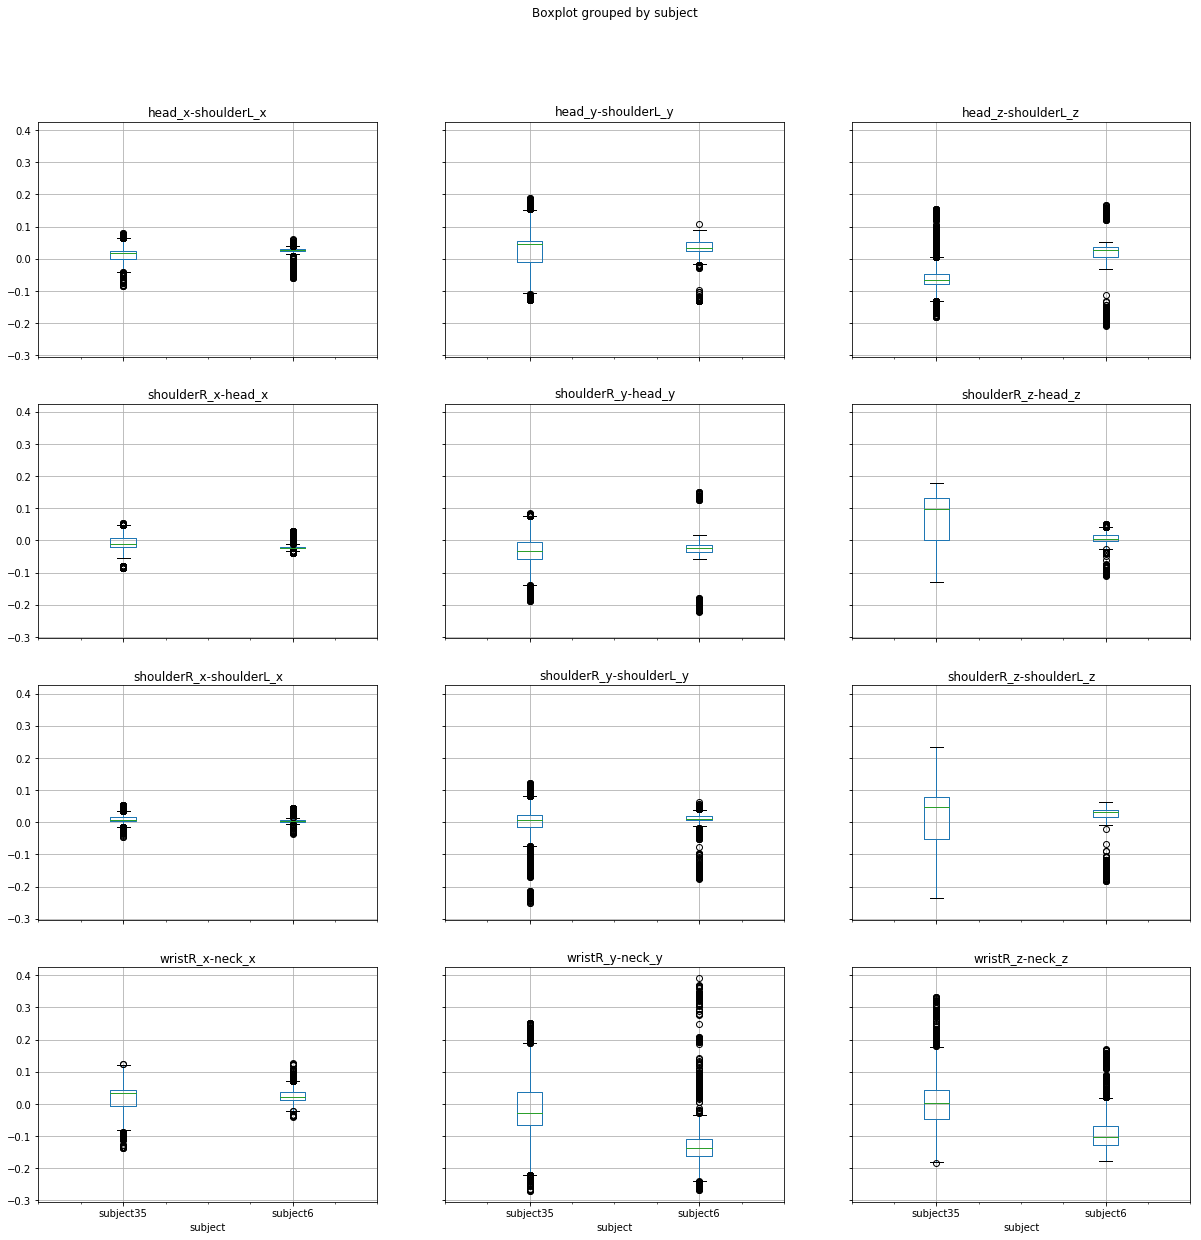

In [27]:
#fig=plt.figure(figsize=(20, 20))
big_posture_df.boxplot(column = specific_posture,
                       by='subject', figsize=(20,20))
plt.show()

## Extract Movement Amplitude features

In [28]:
amplitude_feature_dfs = []
still_joints = ['spineMid', 'neck']
mov_joints = ['handR', 'handL', 'wristL', 'head']
for df in all_subjects_dfs:
    subject = df['subject'].iloc[0]
    subject_amp_dfs = []
    for still in still_joints:
        for mov in mov_joints:            
            subject_amp_dfs.append(mov_amplitude(df, s_joint=still, m_joint=mov).reset_index())
    amp_df = pd.concat(subject_amp_dfs, axis=1)
    amp_df['subject'] = subject
    #print(amp_df)
    amplitude_feature_dfs.append(amp_df)

In [29]:
mov_amplitude(df, s_joint=still, m_joint=mov)

,ampl_freq_neck_x-head_x,ampl_freq_neck_y-head_y,ampl_freq_neck_z-head_z,ampl_max_neck_x-head_x,ampl_max_neck_y-head_y,ampl_max_neck_z-head_z,ampl_min_neck_x-head_x,ampl_min_neck_y-head_y,ampl_min_neck_z-head_z,ampl_mean_neck_x-head_x,ampl_mean_neck_y-head_y,ampl_mean_neck_z-head_z
neck-head,0.077994,0.005571,0.118036,0.049201,0.119837,0.06193,0.000006,0.000024,0.000045,0.014357,0.026607,0.023898


In [30]:
amplitude_df = pd.concat(amplitude_feature_dfs).reset_index()
amplitude_df.drop('index', axis=1, inplace=True)
amplitude_df.drop('level_0', axis=1, inplace=True)
amplitude_df.head()
#amplitude_df.join(mean_posture_features, on='subject')

,ampl_freq_spineMid_x-handR_x,ampl_freq_spineMid_y-handR_y,ampl_freq_spineMid_z-handR_z,ampl_max_spineMid_x-handR_x,ampl_max_spineMid_y-handR_y,ampl_max_spineMid_z-handR_z,ampl_min_spineMid_x-handR_x,ampl_min_spineMid_y-handR_y,ampl_min_spineMid_z-handR_z,ampl_mean_spineMid_x-handR_x,...,ampl_max_neck_x-head_x,ampl_max_neck_y-head_y,ampl_max_neck_z-head_z,ampl_min_neck_x-head_x,ampl_min_neck_y-head_y,ampl_min_neck_z-head_z,ampl_mean_neck_x-head_x,ampl_mean_neck_y-head_y,ampl_mean_neck_z-head_z,subject
0,0.117733,0.000969,0.005329,0.172667,0.713343,0.302261,0.000046,0.000047,0.000258,0.063233,...,0.051531,0.114169,0.109415,7.004004e-07,0.000005,0.000063,0.018224,0.031018,0.038273,subject6
1,0.032730,0.005919,0.011142,0.176384,0.366830,0.267102,0.000138,0.000033,0.000024,0.054636,...,0.049201,0.119837,0.061930,6.282529e-06,0.000024,0.000045,0.014357,0.026607,0.023898,subject35


In [31]:
all_features = amplitude_df.merge(posture_feat_df, on='subject')
all_features.loc[17, 'subject'] = 'subject17' #fix naming error
#all_features['subject']

In [32]:
var_features = list(all_features.var().index[(all_features.var()>0.001).values])
var_features

['ampl_freq_spineMid_x-handR_x',
 'ampl_max_spineMid_y-handR_y',
 'ampl_freq_spineMid_y-handL_y',
 'ampl_max_spineMid_y-handL_y',
 'ampl_max_spineMid_z-handL_z',
 'ampl_max_spineMid_y-wristL_y',
 'ampl_max_spineMid_z-wristL_z',
 'ampl_freq_spineMid_x-head_x',
 'ampl_max_spineMid_y-head_y',
 'ampl_max_neck_y-handR_y',
 'ampl_mean_neck_y-handR_y',
 'ampl_freq_neck_x-handL_x',
 'ampl_freq_neck_y-handL_y',
 'ampl_max_neck_y-handL_y',
 'ampl_max_neck_z-handL_z',
 'ampl_max_neck_y-wristL_y',
 'ampl_freq_neck_z-head_z',
 'ampl_max_neck_z-head_z',
 'handR_y-neck_y',
 'handR_y-shoulderL_y',
 'handR_z-elbowL_z',
 'handR_z-elbowR_z',
 'handR_z-handL_z',
 'handR_z-neck_z',
 'handR_z-shoulderL_z',
 'handR_z-wristL_z',
 'head_y-elbowL_y',
 'head_y-elbowR_y',
 'head_y-handL_y',
 'head_y-handR_y',
 'head_y-wristL_y',
 'head_y-wristR_y',
 'head_z-elbowL_z',
 'head_z-elbowR_z',
 'head_z-handL_z',
 'head_z-handR_z',
 'head_z-shoulderL_z',
 'head_z-spineShoulder_z',
 'head_z-wristR_z',
 'neck_y-elbowL_y',

In [33]:
all_features[var_features].corr()

,ampl_freq_spineMid_x-handR_x,ampl_max_spineMid_y-handR_y,ampl_freq_spineMid_y-handL_y,ampl_max_spineMid_y-handL_y,ampl_max_spineMid_z-handL_z,ampl_max_spineMid_y-wristL_y,ampl_max_spineMid_z-wristL_z,ampl_freq_spineMid_x-head_x,ampl_max_spineMid_y-head_y,ampl_max_neck_y-handR_y,...,spineShoulder_y-wristR_y,spineShoulder_z-handR_z,spineShoulder_z-wristR_z,wristR_y-elbowL_y,wristR_y-elbowR_y,wristR_y-handL_y,wristR_y-neck_y,wristR_z-handL_z,wristR_z-neck_z,wristR_z-wristL_z
ampl_freq_spineMid_x-handR_x,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_max_spineMid_y-handR_y,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_freq_spineMid_y-handL_y,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ampl_max_spineMid_y-handL_y,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_max_spineMid_z-handL_z,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_max_spineMid_y-wristL_y,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_max_spineMid_z-wristL_z,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_freq_spineMid_x-head_x,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_max_spineMid_y-head_y,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ampl_max_neck_y-handR_y,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [34]:
import seaborn as sns
%matplotlib inline

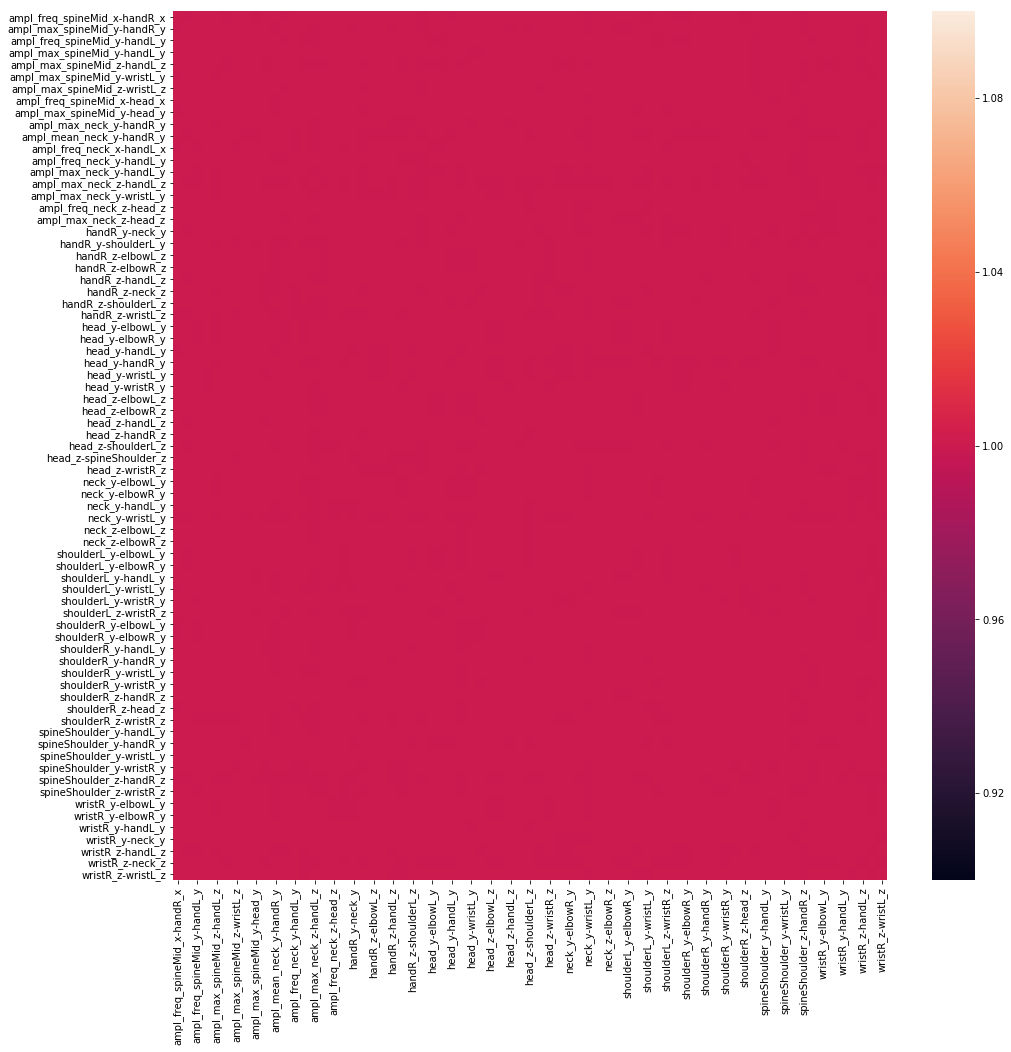

In [35]:
fig=plt.figure(figsize=(16, 16))
sns.heatmap(np.abs(all_features[var_features].corr()))

### Sensor features

In [8]:
import sensor_data

In [17]:
sensor_files1 = glob.glob('../data/behavior_AND_personality_dataset/binary/*.txt')
sensor_files2 = glob.glob('../data/data_recordings_master/binary/*.txt')
sensor_files1[1]

'../data/behavior_AND_personality_dataset/binary/18-10-16_sensors_subject14.txt'

In [19]:
#TODO: extract sensor features and concat to feature dataframe

### Speed features

In [ ]:
import preprocessing
import speed_feature

In [ ]:
#TODO: extract speed features and concat to feature

### Load personality data

In [ ]:
import personality_data

In [ ]:
personality_df = personality_data.personality_data_to_data_frame('../data/behavior_AND_personality_dataset/big5_personality_result.txt')
names = [s.replace('_', '') for s in personality_df['name']]
personality_df = personality_df.transpose()
#print(personality_df)
cols = personality_df.index[11:]
#print(cols)
personality_df = normalize_data(personality_df[11:], columns=personality_df.columns).transpose()
personality_df.columns = cols
personality_df['subject'] = names
personality_df.head()

In [ ]:
with open('../data/data_recordings_master/personality.txt', 'r') as f:
    rows = [row.replace('\r', '').replace('\n', '').split() for row in f.readlines()]
#print(rows)
new_rows = []
for row in rows:
    new_row = []
    for v in row:
        if v.startswith('s'):
            new_row.append(v)
        else:
            new_row.append(int(v))
    new_rows.append(new_row)
            
columns = personality_data.get_column_names()[:11]
personality_df2 = pd.DataFrame(new_rows, columns=columns)
personality_df2.head()

In [ ]:
extraversion = 5 - personality_df2['question_1'].values + personality_df2['question_6'].values
agreeableness = personality_df2['question_2'].values+ (5-personality_df2['question_7'].values)
conscientiousness = 5-personality_df2['question_3'].values + personality_df2['question_8'].values
neuroticism = 5-personality_df2['question_4'].values + personality_df2['question_9'].values
openess = 5-personality_df2['question_5'].values+personality_df2['question_10'].values

In [ ]:
personality_df2['extraversion'] = extraversion
personality_df2['agreeableness'] = agreeableness
personality_df2['conscientiousness'] = conscientiousness
personality_df2['neuroticism'] = neuroticism
personality_df2['openness_to_experience'] = openess
personality_df2.head()

In [ ]:
names = [s.replace('_', '') for s in personality_df2['name']]
personality_df2 = personality_df2.transpose()
#print(personality_df)
cols = personality_df2.index[11:]
#print(cols)
personality_df2 = normalize_data(personality_df2[11:], columns=personality_df2.columns).transpose()
personality_df2.columns = cols
personality_df2['subject'] = names
personality_df2.head()

In [ ]:
personality_full = pd.concat([personality_df, personality_df2], axis=0)
personality_full.head()

## Correlations

In [ ]:
feat_pers_df = all_features[var_features+['subject']].merge(personality_full, on = 'subject')
big5 = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']

In [ ]:
feat_pers_df.corr()[big5]

In [ ]:
fig=plt.figure(figsize=(20, 20))
sns.heatmap(np.abs(feat_pers_df.corr()[big5]), annot=True)

In [11]:
import preprocessing
import speed_feature

In [13]:
speed_feature.speed(all_subjects_dfs[0])

KeyError: ('head_x', u'occurred at index subject')

In [16]:
all_subjects_dfs[0].iloc[0]['head_x']

414.73573333299998